In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('heart.csv')

print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

## Info

- Age : Age of the patient


- Sex : Sex of the patient


- exang: exercise induced angina (1 = yes; 0 = no)


- ca: number of major vessels (0-3)


- cp : Chest Pain type chest pain type

    -Value 1: typical angina
    
    -Value 2: atypical angina
    
    -Value 3: non-anginal pain
    
    -Value 4: asymptomatic


- trtbps : resting blood pressure (in mm Hg)


- chol : cholestoral in mg/dl fetched via BMI sensor


- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


- rest_ecg : resting electrocardiographic results

    -Value 0: normal
    
    -Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
    -Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


- thalach : maximum heart rate achieved


 - target : 0= less chance of heart attack 
            1= more chance of heart attack

## Target Variable

In [3]:
target = 'target'

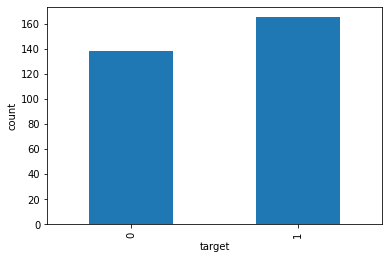

In [4]:
df.groupby(target)['age'].count().plot.bar()
plt.ylabel('count')
plt.show()

In [5]:
print('Y: {}%'.format(round(df[target].value_counts()[0] * 100 / len(df), 3)))
print('Y: {}%'.format(round(df[target].value_counts()[1] * 100 / len(df), 3)))

Y: 45.545%
Y: 54.455%


Dataset is balanced

## Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Discrete Features

In [7]:
dis_features = [feature for feature in df.columns if len(df[feature].unique()) < 20 and feature != target]

print(dis_features)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


### Distribution

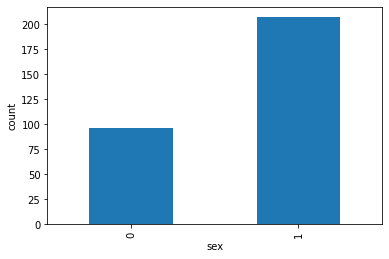

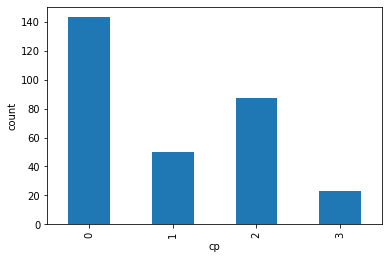

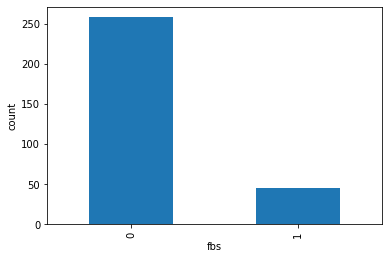

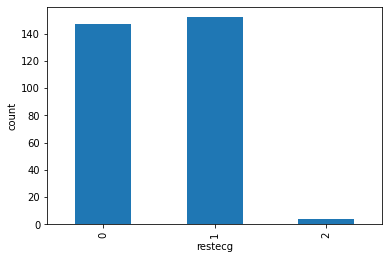

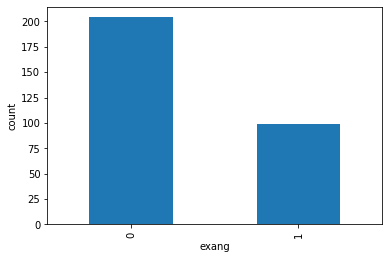

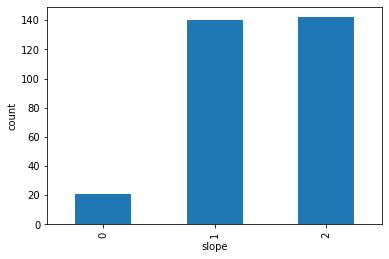

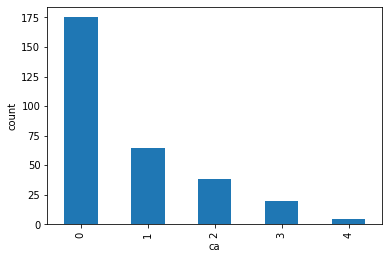

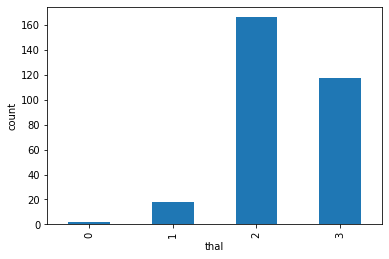

In [8]:
for feature in dis_features:
    df.groupby(feature)[target].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### vs Target Variable

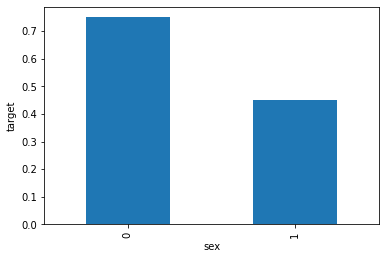

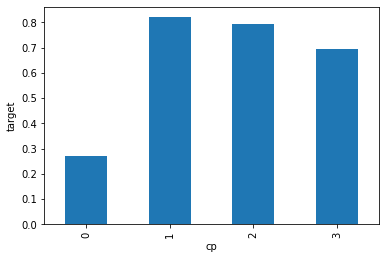

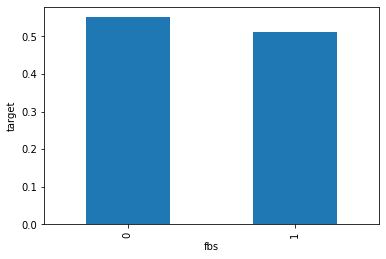

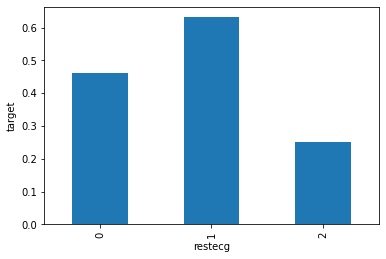

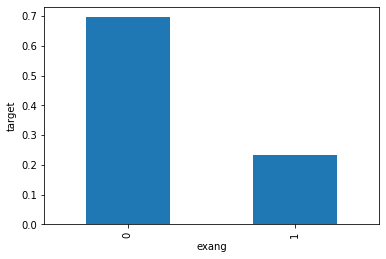

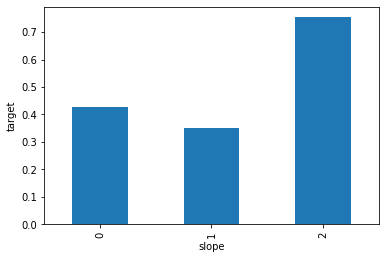

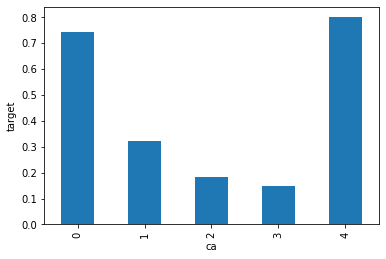

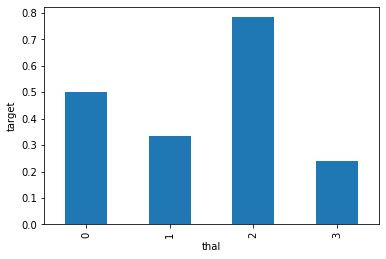

In [9]:
for feature in dis_features:
    df.groupby(feature)[target].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

- for 'slope': 0 value can be replaced with 1 as both have almost identical relationship with target variable
- for 'ca': 4 value can be replaced with 0 as both have almost identical relationship with target variable
- for 'thal': 0 value can be replaced with 1 as both have almost identical relationship with target variable

## Continuous Features

In [10]:
con_features = [feature for feature in df.columns if feature not in dis_features and feature != target]

print(con_features)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### Distribution

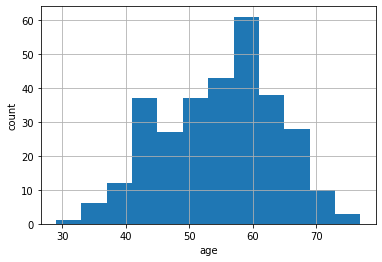

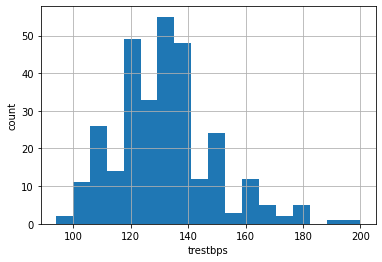

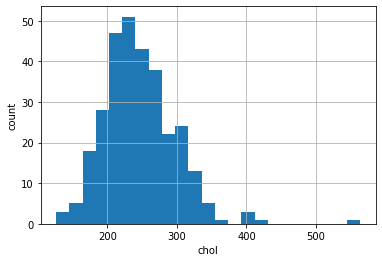

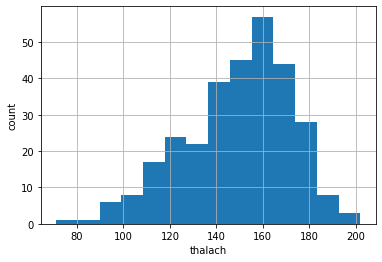

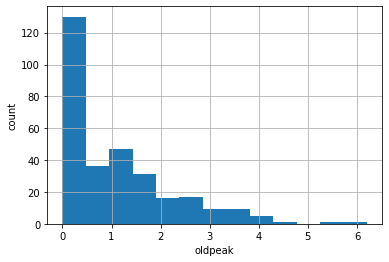

In [11]:
for feature in con_features:
    iqr = stats.iqr(df[feature], interpolation = 'midpoint')
    h = (2 * iqr) / (len(df[feature]) ** (1/3))
    bins = round((max(df[feature]) - min(df[feature])) / h)
    
    df[feature].hist(bins = bins)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### Outliers

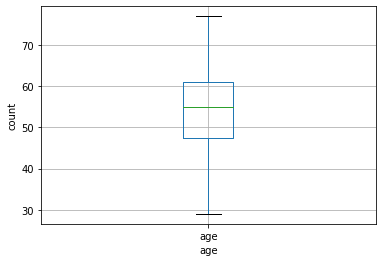

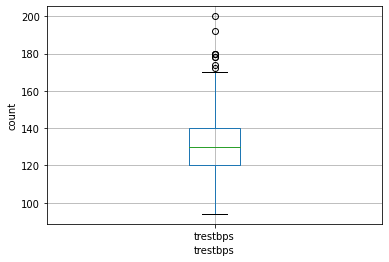

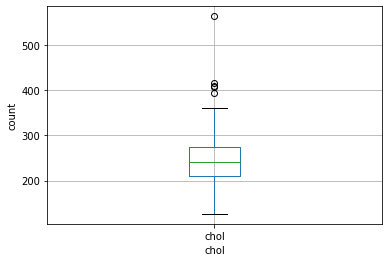

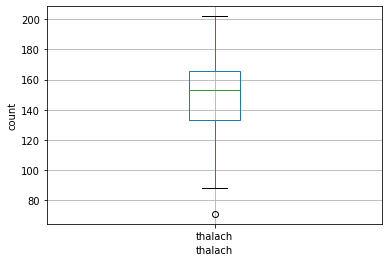

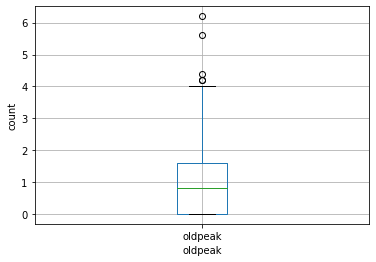

In [12]:
for feature in con_features:
    df.boxplot(column = feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

### Transformation

age values to replace: 0%


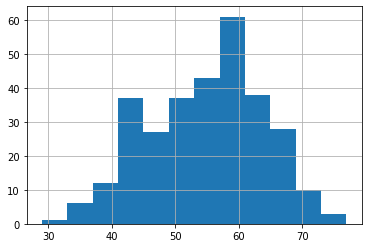

trestbps values to replace: 2%


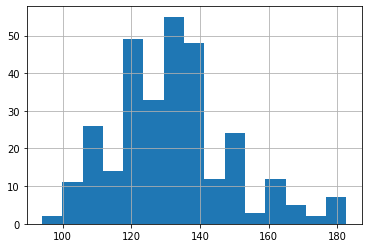

chol values to replace: 4%


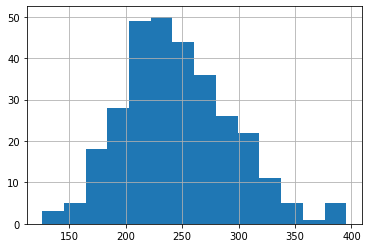

thalach values to replace: 0%


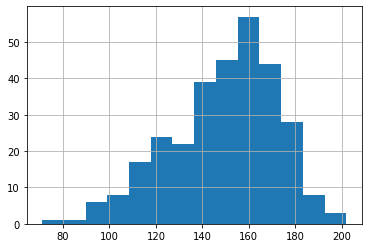

oldpeak values to replace: 3%


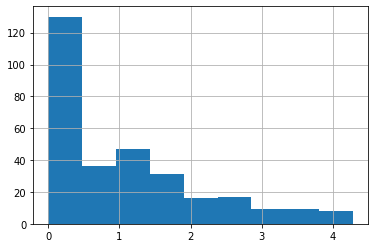

In [13]:
for feature in con_features:
    extreme = df[feature].median() + 3 * df[feature].std()
    print('{} values to replace: {}%'.format(feature, len(df.loc[df[feature] > extreme])))
    
    data = df.copy()
    data[feature] = np.where(data[feature] > extreme, extreme, data[feature])
    
    iqr = stats.iqr(data[feature], interpolation = 'midpoint')
    h = (2 * iqr) / (len(data[feature]) ** (1/3))
    bins = round((max(data[feature]) - min(data[feature])) / h)
    
    data[feature].hist(bins = bins)
    plt.show()

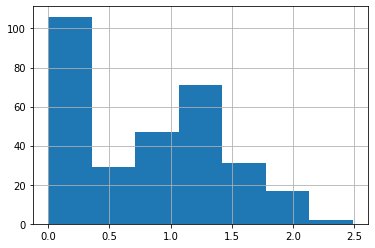

In [14]:
for feature in con_features[-1:]:
    data = df.copy()
    
    data[feature] = data[feature] ** 0.5
    
    iqr = stats.iqr(data[feature], interpolation = 'midpoint')
    h = (2 * iqr) / (len(data[feature]) ** (1/3))
    bins = round((max(data[feature]) - min(data[feature])) / h)
    
    data[feature].hist(bins = bins)
    plt.show()

# Feature Engineering

## Discrete Features

In [15]:
df['slope'] = np.where(df['slope'] == 0, 1, df['slope'])
df['ca'] = np.where(df['ca'] == 4, 0, df['ca'])
df['thal'] = np.where(df['thal'] == 0, 1, df['thal'])

## Continuous Features Transformation

In [16]:
for feature in con_features:
    extreme = df[feature].median() + 3 * df[feature].std()
    df[feature] = np.where(df[feature] > extreme, extreme, df[feature])

In [17]:
df['oldpeak'] = df['oldpeak'] ** 0.5

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,1.516575,1,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,1.870829,1,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.183216,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.894427,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.774597,2,0,2,1


In [19]:
df.to_csv('processed_data.csv', index = False)

# Feature Selection

In [20]:
df = pd.read_csv('processed_data.csv')

print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,1.516575,1,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,1.870829,1,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.183216,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.894427,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.774597,2,0,2,1


In [21]:
X = df.iloc[:, :-1]
y = df[target]

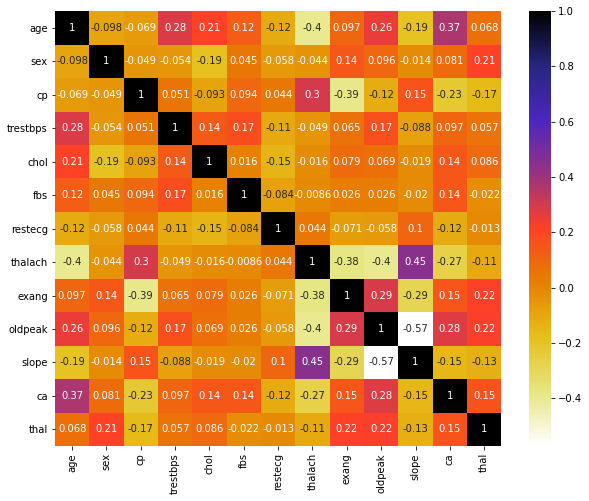

In [22]:
cor = X.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

# Models

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

## Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [30]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred_lr = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits = 4))

[[23  4]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8846    0.8519    0.8679        27
           1     0.8857    0.9118    0.8986        34

    accuracy                         0.8852        61
   macro avg     0.8852    0.8818    0.8832        61
weighted avg     0.8852    0.8852    0.8850        61



## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
scores = []
neighbors = np.arange(5, 13)

for n in neighbors:
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))
    
best_neighbors = neighbors[scores.index(max(scores))]
print(best_neighbors)

8


In [34]:
model = KNeighborsClassifier(n_neighbors = best_neighbors)

model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [35]:
y_pred_knn = model.predict(X_test_scaled)

In [36]:
y_pred_knn = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, digits = 4))

[[23  4]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8846    0.8519    0.8679        27
           1     0.8857    0.9118    0.8986        34

    accuracy                         0.8852        61
   macro avg     0.8852    0.8818    0.8832        61
weighted avg     0.8852    0.8852    0.8850        61



## SVM

In [37]:
from sklearn.svm import SVC

model = SVC()

In [38]:
model.fit(X_train_scaled, y_train)

SVC()

In [39]:
y_pred_svm = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, digits = 4))

[[21  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0     0.9130    0.7778    0.8400        27
           1     0.8421    0.9412    0.8889        34

    accuracy                         0.8689        61
   macro avg     0.8776    0.8595    0.8644        61
weighted avg     0.8735    0.8689    0.8672        61



## Ensemble Models

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [42]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits = 4))

[[23  4]
 [ 4 30]]
              precision    recall  f1-score   support

           0     0.8519    0.8519    0.8519        27
           1     0.8824    0.8824    0.8824        34

    accuracy                         0.8689        61
   macro avg     0.8671    0.8671    0.8671        61
weighted avg     0.8689    0.8689    0.8689        61



### XGBoost

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder = False)

In [45]:
model.fit(X_train, y_train)

[21:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [46]:
y_pred_xgb = model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits = 4))

[[21  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0     0.7241    0.7778    0.7500        27
           1     0.8125    0.7647    0.7879        34

    accuracy                         0.7705        61
   macro avg     0.7683    0.7712    0.7689        61
weighted avg     0.7734    0.7705    0.7711        61



## ANN

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import RandomSearch, HyperParameters

In [50]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Dense(units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 8),
                           kernel_initializer = hp.Choice('dense_1_kernel', values = ['he_normal', 'he_uniform']),
                           activation = 'relu',
                           input_dim = 13),
        keras.layers.Dense(units = hp.Int('dense_2_units', min_value = 32, max_value = 64, step = 8),
                           kernel_initializer = hp.Choice('dense_1_kernel', values = ['he_normal', 'he_uniform']),
                           activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units = hp.Int('dense_3_units', min_value = 32, max_value = 64, step = 8),
                           kernel_initializer = hp.Choice('dense_1_kernel', values = ['he_normal', 'he_uniform']),
                           activation = 'relu'),
        keras.layers.Dense(units = 1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [51]:
tuner_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 3, directory = 'ann_hp_output', project_name = 'heart_disease')

In [52]:
tuner_search.search(X_train_scaled, y_train, epochs = 5, validation_split = 0.1)

Trial 3 Complete [00h 00m 00s]
val_accuracy: 0.6800000071525574

Best val_accuracy So Far: 0.8799999952316284
Total elapsed time: 00h 00m 03s
INFO:tensorflow:Oracle triggered exit


In [53]:
model = tuner_search.get_best_models(num_models = 1)[0]

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 72)                1008      
_________________________________________________________________
dense_1 (Dense)              (None, 48)                3504      
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 56)                2744      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 57        
Total params: 7,313
Trainable params: 7,313
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train_scaled, y_train, epochs = 10, validation_split = 0.1, initial_epoch = 5)

Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 0.4084 - accuracy: 0.8341 - val_loss: 0.2465 - val_accuracy: 0.8800
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8157 - val_loss: 0.2217 - val_accuracy: 0.8800
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.8295 - val_loss: 0.2047 - val_accuracy: 0.9200
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8664 - val_loss: 0.1941 - val_accuracy: 0.9200
Epoch 10/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3948 - accuracy: 0.8203 - val_loss: 0.1904 - val_accuracy: 0.9200


In [56]:
y_pred_ann = np.round(model.predict(X_test_scaled)).astype(int)

print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann, digits = 4))

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8750    0.7778    0.8235        27
           1     0.8378    0.9118    0.8732        34

    accuracy                         0.8525        61
   macro avg     0.8564    0.8448    0.8484        61
weighted avg     0.8543    0.8525    0.8512        61



# Random Forest Hyperparamter tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
random_grid = {'n_estimators': [30, 50, 100, 200, 400, 500, 600, 800, 1000],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'log2', 'sqrt'],
               'max_depth': [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 7],
               'bootstrap': [True]}

In [66]:
model = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid,
                               n_iter = 150,
                               cv = 3,
                               verbose = 2,
                               random_state = 0,
                               n_jobs = -1)

In [67]:
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [78]:
param_grid = {'n_estimators': [100, 150, 200, 250, 500],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'log2', 'sqrt'],
               'max_depth': [None],
               'min_samples_split': [4, 5, 6, 7],
               'min_samples_leaf': [2, 3, 4],
               'bootstrap': [True]}

In [79]:
model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 250}

In [80]:
model = RandomForestClassifier(n_estimators = 250,
                               min_samples_split = 7,
                               min_samples_leaf = 2,
                               max_features = 'sqrt',
                               max_depth = None,
                               criterion = 'gini',
                               bootstrap = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=7, n_estimators=250)

In [81]:
y_pred_rf = model.predict(X_test)

In [82]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits = 4))

[[23  4]
 [ 4 30]]
              precision    recall  f1-score   support

           0     0.8519    0.8519    0.8519        27
           1     0.8824    0.8824    0.8824        34

    accuracy                         0.8689        61
   macro avg     0.8671    0.8671    0.8671        61
weighted avg     0.8689    0.8689    0.8689        61

